# 00 | Python Packages

# numpy

## 随机数生成

In [14]:
#对纯数字的list进行数学运算，用array
import numpy as np
a = [1,2,3,4]
d=np.array(a)

print(d+1)
print(d*2)
print(sum(d))

[2 3 4 5]
[2 4 6 8]
10


生成数组可以用
- `np.random.randint(start, end, (shape))`
- `np.random.randn(shape)`生成正态分布的随机数
- `np.arange(start, end, step)`生成等差数列
- `np.repeat()`重复数组
- `np.random.seed(23)` 设置随机数种子

!!! note "H(head)&T(Tail) 代表硬币的正反面"

In [15]:
# 连续两次掷有4个面的骰子
sample=1000
x = np.random.randint(1,5,size=(2,sample))
print(x)

[[1 3 3 ... 1 2 3]
 [1 2 4 ... 1 4 3]]


In [16]:
y = np.random.rand(5) # 默认范围是0到1
y


array([0.66594849, 0.68980149, 0.11711982, 0.87938403, 0.27968857])

与`shuffle`不同的是，`permutation`不会改变原数组

In [17]:
np.random.shuffle(y) # 打乱顺序
y
np.random.permutation(y) # 打乱顺序,
y

array([0.87938403, 0.66594849, 0.11711982, 0.68980149, 0.27968857])

In [18]:
import numpy as np
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr) # 只对第一维度进行打乱

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

## 矩阵

### 生成矩阵

```python
import numpy as np
np.array([1,2])
np.array([[1,2],[3,4]]) ## 注意这里的两个方括号


np.ones(4)  ## 全1矩阵       
np.zeros(4)  ## 全0矩阵
np.ones((2,4)) ## 注意这里的两层括号

np.eye(5) ## 单位阵

np.diag((1,2,4)) ## 对角阵

np.reshape()

np.empty()
```


```python
np.random.randint(start,end,(shape))
np.diag(np.random.randint(10,size=3)) # 随机对角阵
np.array(np.random.randint(10,size=(3,4)))
```

```python
#数组的修改
res[:, j, :, :] 切片
```


In [19]:
import numpy as np
a=np.array(np.random.randint(10,size=(3,4)))
print(a)
a[1,::-2]  # 切片的应用

[[0 5 8 1]
 [0 3 6 8]
 [7 8 7 6]]


array([8, 3], dtype=int32)

### 矩阵运算

`@` 做矩阵乘法

`*` 做点乘 -> 对应相乘

`matrix.T ` 转置


```py
np.maximum(x, 0)
np.exp(-x)
```





array在维度是1的时候(1行向量or1列向量)，会自动转置，所以容易出现神奇错误，最好初始化的时候规定好

```py
np.lib.stride_tricks.as_strided(source_list, shape=shape, strides=stride)
# stride 是数组在各个维度所对应的距离A
np.tensordot(A, B, [(1, 4, 5), (1,2, 3)])
# 
```

### 广播机制
- 最神奇的机制：广播机制（还没有完全学会）


### 方程求解

In [20]:
b = np.array(np.random.randint(20,size=(4,1)))
A = np.array(np.random.randint(20,size=(4,4)))
np.linalg.inv(A)

# 求解 Ax = b
np.linalg.solve(A,b)
np.linalg.inv(A)@b ## 更慢

array([[ 0.45078684],
       [ 0.2055794 ],
       [-0.27567954],
       [ 0.30271817]])

### 矩阵分解

### 时间测量


在命令前面加上 `%timeit` 可以获得多次运行命令的时间

### meshgrid 生成网格坐标

```python
X, Y = np.meshgrid(x, y)
```

- `*xi`：一个或多个一维数组，表示坐标轴上的点。如果只传入一个数组，则默认为 x 轴上的点，并会生成一个与该数组形状相同的 y 轴数组。
- `indexing`：可选参数，用于指定网格的索引方式。默认为 'xy'，表示使用笛卡尔坐标系；也可以设置为 'ij'，表示使用矩阵坐标系。
- `sparse`：可选参数，用于指定是否生成稀疏网格。默认为 False，表示生成密集网格；如果设置为 True，则只生成网格的行和列索引，而不生成完整的网格。
- [Python-Numpy模块Meshgrid函数 - 知乎](https://zhuanlan.zhihu.com/p/33579211)

In [21]:
import numpy as np

# 生成二维网格
x = np.linspace(-5, 5, 100)  # x 轴上的点
y = np.linspace(-5, 5, 100)  # y 轴上的点
X, Y = np.meshgrid(x, y)

In [22]:
import numpy as np
a=[['a','a','a'],['b','b','b']] ## 2个成员
b=[[1,2,3],[1,2,3]] ## 3个成员
## 纵向展开
print (np.vstack([a,b]),'\n Dimension: ',np.vstack([a,b]).shape)
## 横向展开
print(np.hstack([a,b]),'\n Dimension: ',np.hstack([a,b]).shape)
## 网格展开
print(np.dstack([a,b]),'\n Dimension: ',np.dstack([a,b]).shape)

[['a' 'a' 'a']
 ['b' 'b' 'b']
 ['1' '2' '3']
 ['1' '2' '3']] 
 Dimension:  (4, 3)
[['a' 'a' 'a' '1' '2' '3']
 ['b' 'b' 'b' '1' '2' '3']] 
 Dimension:  (2, 6)
[[['a' '1']
  ['a' '2']
  ['a' '3']]

 [['b' '1']
  ['b' '2']
  ['b' '3']]] 
 Dimension:  (2, 3, 2)


### 图像处理

- 把图片按照卷积核进行分割成多维的数组


In [23]:
def get_feature_map(self, X, kh, kw, s):#向量化处理
    '''
    :param X:
    :param kh: height of kernel
    :param kw: width of kernel
    :param s: stride
    :return: 按k*k大小分割好的数组
    '''
    N, C, H, W = X.shape
    oh = (H - kh) // s + 1
    ow = (W - kw) // s + 1
    shape = (N, C, oh, ow, kh, kw)  #切割形状
    stride = (*X.strides[:2], X.strides[-2] * s, X.strides[-1] * s, *X.strides[-2:])#切割方式
    A = np.lib.stride_tricks.as_strided(X, shape=shape, strides=stride)
    return A

# pandas

## Dataframe
- 表格
- 读入和写出
- 处理csv,xls,json,sql

### 创建表格

- 从字典创建
- zip创建

In [24]:
import pandas as pd
pd.options.mode.chained_assignment = None # 防止出现SettingWithCopyWarning
l1=[1,2,3,4]
l2=[21,18,22,19]
l3=['Adam','Bob','Cinda','David']

dict3={'ID':l1,'Age':l2,'Name':l3}
df = pd.DataFrame(dict3)
df

,ID,Age,Name
0,1,21,Adam
1,2,18,Bob
2,3,22,Cinda
3,4,19,David


In [25]:
# 简化写法
df = pd.DataFrame(list(zip(l1, l2,l3)),
               columns =['ID', 'Age', 'Name'])
df

,ID,Age,Name
0,1,21,Adam
1,2,18,Bob
2,3,22,Cinda
3,4,19,David


### 读入读出

In [26]:
hang = pd.read_csv("hang.csv",delimiter=";", quotechar='"')

hang.head(5) # 前5行
hang.tail(5) # 后5行

hang.dtypes # 所有字段的格式
hang.info()

hang.describe() # 把所有有关数字的信息做一个整理

FileNotFoundError: [Errno 2] No such file or directory: 'hang.csv'

In [ ]:
# 保存到excel
hang.to_excel("hang.xlsx", sheet_name="weather", index=False) # 转换成excel
# 从excel读取
hang = pd.read_excel("hang.xlsx", sheet_name="weather")
hang 

### 表格操作

```python
table['name'] # 选择一列
type(table['name'])
```


```python
reduce=hang[['time','T']] # 选取某一列
reduce[reduce["T"] > 35]
reduce.iloc[9:14, 0:2]
reduce.loc[reduce["T"] > 35, "time"]
```


### 表格合并
- merge
- concat

```python
pd.merge(sub3, sub4,
        how='left', left_on='time', right_on='time')
```

```python
pd.concat([sub1, sub2], axis=0)
pd.concat([sub1, sub2], axis=1)
```

### 简单绘图

```python
hang['P'].plot()
(hang['Tx']-hang['Tn']).plot.hist()
```

### 时间信息画图

```
reduce["time"]=pd.to_datetime(reduce["time"],dayfirst=True)
reduce
```

```python
reduce["month"]=reduce['time'].dt.month
reduce['year']=reduce['time'].dt.year
reduce['hour']=reduce['time'].dt.hour
```


```python
reduce.groupby(["month","year"]).mean()
```




# matplotlib & seaborn

[seaborn: statistical data visualization — seaborn 0.13.2 documentation](https://seaborn.pydata.org/)

statistical data visualization
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### 直方图

[[0.46170158 0.15961928 0.55651439 ... 0.74875877 0.23320142 0.58416009]
 [0.87636847 0.77292486 0.73351082 ... 0.81472865 0.8046621  0.61990908]]


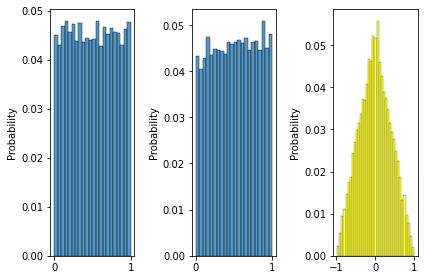

In [ ]:
# A和B约定见面，各自将迟到0-1小时。先来者等待15分钟后将离开。
# A和B见到的概率多大？

import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

ab = np.random.rand(2,10000)
print(ab)

f, axs = plt.subplots(1,3)

sns.histplot(ab[0],stat='probability',ax=axs[0])
sns.histplot(ab[1],stat='probability',ax=axs[1])
sns.histplot(ab[0]-ab[1],stat='probability',ax=axs[2],color='yellow')
plt.tight_layout() # 调整子图之间的间距

`discrete` 参数在 `sns.histplot` 函数中的作用是指定数据是否为离散型数据。设置 discrete=True 会使得直方图的每个条形对应一个离散值，而不是一个连续的区间

### 概率分布

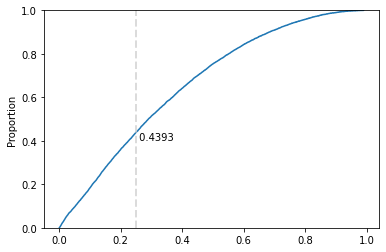

In [ ]:
# 从分布的积分图形得到概率
f, axs = plt.subplots(1)

sns.ecdfplot(abs(ab[0]-ab[1]),ax=axs) # cumulative distribution function
x_special = 0.25

for line in axs.get_lines():
    x,y = line.get_data()
    ind = np.argwhere(x > x_special)[0,0]  # first index where x is larger than x_special
    axs.text(x_special,y[ind], f' {y[ind]:.4f}', ha='left', va='top') # maybe color=line.get_color()
axs.axvline(x_special, linestyle='--', color='#cfcfcf', lw=2, alpha=0.75)
plt.show()

# seaborn

[seaborn常见绘图学习总结（分布图） - 简书](https://www.jianshu.com/p/4b6222a62947)

[Seaborn常见绘图总结\_seaborn 绘图总结 csdn-CSDN博客](https://blog.csdn.net/qq_40195360/article/details/86605860)

## relational Plot | 关系图

### Scatter Plot | 散点图



### lineplot

### jointplot

- `x`,`y`：代表待分析的成对变量，有两种模式，第一种模式：在参数data传入数据框时，x、y均传入字符串，指代数据框中的变量名；第二种模式：在参数data为None时，x、y直接传入两个一维数组，不依赖数据框
- `data`：与上一段中的说明相对应，代表数据框，默认为None
- `kind`：字符型变量，用于控制展示成对变量相关情况的主图中的样式
- `color`：控制图像中对象的色彩
- `height`：控制图像为正方形时的边长
- `ratio`：int型，调节联合图与边缘图的相对比例，越大则边缘图越矮，默认为5
- `space`：int型，用于控制联合图与边缘图的空白大小
- `xlim`,`ylim`：设置x轴与y轴显示范围
- `joint_kws`,`marginal_kws`,`annot_kws`：传入参数字典来分别精细化控制每个组件


[详解seaborn中的kdeplot、rugplot、distplot与jointplot\_seaborn.kdeplot-CSDN博客](https://blog.csdn.net/sunghosts/article/details/109972183)

[Seaborn系列(三)：分布统计绘图(distribution)\_displot-CSDN博客](https://blog.csdn.net/hustlei/article/details/123091236)
## distplot


## kdeplot

## rugplot


# sklearn

安装方法，注意名字不是sklearn

```shell
pip install scikit-learn
```

```shell title="安装statsmodels遇到问题"
pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple/
```
[statsmodels · PyPI](https://pypi.org/project/statsmodels/#files)


这个库执行需要翻墙，而且很容易连接不上